<a href="https://colab.research.google.com/github/akbarjon2000/DataScience/blob/main/perseptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
result = pd.Series(np.arange(5), index=['a', 'b','c', 'd', 'e'])

In [4]:
result

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [5]:
result.values

array([0, 1, 2, 3, 4])

# New Section

In [6]:
pwd

'/content'

In [9]:
df = pd.read_csv('/content/data.csv')

In [10]:
df

,,,,,,,,,,,WR-1733
시간,Digital(라인주파수 (Hz)),Digital(선간전압 RS (V)),Digital(상전류 R (A)),Digital(선간전압 ST (V)),Digital(상전류 S (A)),Digital(선간전압 ST (V)),Digital(상전류 T (A)),Digital(유효전력 (W)),Digital(무효전력 (Var)),Digital(역률 (%)),Digital(유효전력량계 (0.1kwh))
2023.03.16 00:00:00,60.04,234.44,0,232.77,0,234.98,0,0,0,0,2623.1
2023.03.16 00:02:00,60.04,234.13,0,232.38,0,234.7,0,0,0,0,2623.1
2023.03.16 00:04:00,60.01,234.17,0,232.59,0,234.83,0,0,0,0,2623.1
2023.03.16 00:06:00,60.05,234.48,0,232.6,0,234.92,0,0,0,0,2623.1
...,...,...,...,...,...,...,...,...,...,...,...
2023.03.17 23:50:00,60.04,233.42,0,231.71,0,234,0,0,0,0,2676.4
2023.03.17 23:52:00,60.07,233.76,0,232.1,0,234.19,0,0,0,0,2676.4
2023.03.17 23:54:00,60.07,233.65,0,232.06,0,234.05,0,0,0,0,2676.4
2023.03.17 23:56:00,60.07,233.89,0,232.3,0,234.33,0,0,0,0,2676.4


In [19]:
df = pd.read_csv('/content/data.csv', skiprows=2, names=["Time", "Freq", "V_RS", "I_R", "V_ST", "I_S","V_TR", "I_T", "AP", "RP", "Power Factor", "Accumulated Power"])

In [17]:
df.names = ["Time", "Freq", "V_RS", "I_R", "V_ST", "I_S","V_TR", "I_T", "AP", "RP", "Power Factor", "Accumulated Power"]

<ipython-input-17-83439d6eb6e1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.names = ["Time", "Freq", "V_RS", "I_R", "V_ST", "I_S","V_TR", "I_T", "AP", "RP", "Power Factor", "Accumulated Power"]


,,,,,,,,,,,WR-1733
시간,Digital(라인주파수 (Hz)),Digital(선간전압 RS (V)),Digital(상전류 R (A)),Digital(선간전압 ST (V)),Digital(상전류 S (A)),Digital(선간전압 ST (V)),Digital(상전류 T (A)),Digital(유효전력 (W)),Digital(무효전력 (Var)),Digital(역률 (%)),Digital(유효전력량계 (0.1kwh))
2023.03.16 00:00:00,60.04,234.44,0,232.77,0,234.98,0,0,0,0,2623.1
2023.03.16 00:02:00,60.04,234.13,0,232.38,0,234.7,0,0,0,0,2623.1
2023.03.16 00:04:00,60.01,234.17,0,232.59,0,234.83,0,0,0,0,2623.1
2023.03.16 00:06:00,60.05,234.48,0,232.6,0,234.92,0,0,0,0,2623.1
...,...,...,...,...,...,...,...,...,...,...,...
2023.03.17 23:50:00,60.04,233.42,0,231.71,0,234,0,0,0,0,2676.4
2023.03.17 23:52:00,60.07,233.76,0,232.1,0,234.19,0,0,0,0,2676.4
2023.03.17 23:54:00,60.07,233.65,0,232.06,0,234.05,0,0,0,0,2676.4
2023.03.17 23:56:00,60.07,233.89,0,232.3,0,234.33,0,0,0,0,2676.4


In [20]:
df

,Time,Freq,V_RS,I_R,V_ST,I_S,V_TR,I_T,AP,RP,Power Factor,Accumulated Power
0,2023.03.16 00:00:00,60.04,234.44,0.0,232.77,0.0,234.98,0,0,0,0.0,2623.1
1,2023.03.16 00:02:00,60.04,234.13,0.0,232.38,0.0,234.70,0,0,0,0.0,2623.1
2,2023.03.16 00:04:00,60.01,234.17,0.0,232.59,0.0,234.83,0,0,0,0.0,2623.1
3,2023.03.16 00:06:00,60.05,234.48,0.0,232.60,0.0,234.92,0,0,0,0.0,2623.1
4,2023.03.16 00:08:00,60.05,234.53,0.0,232.82,0.0,235.11,0,0,0,0.0,2623.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2023.03.17 23:50:00,60.04,233.42,0.0,231.71,0.0,234.00,0,0,0,0.0,2676.4
1099,2023.03.17 23:52:00,60.07,233.76,0.0,232.10,0.0,234.19,0,0,0,0.0,2676.4
1100,2023.03.17 23:54:00,60.07,233.65,0.0,232.06,0.0,234.05,0,0,0,0.0,2676.4
1101,2023.03.17 23:56:00,60.07,233.89,0.0,232.30,0.0,234.33,0,0,0,0.0,2676.4


In [21]:
import matplotlib as plt

<Axes: xlabel='Time'>

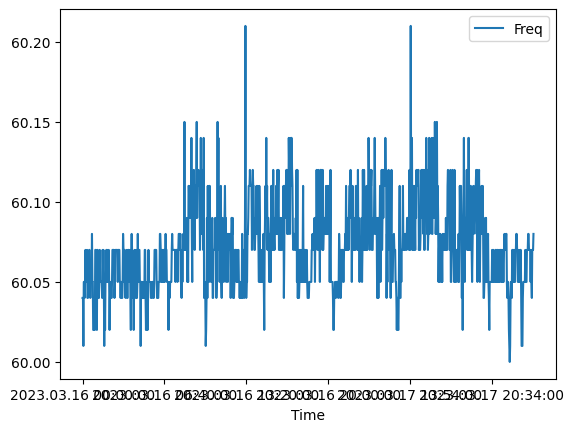

In [23]:
df.plot(x='Time', y='Freq')

In [24]:
df.index = pd.to_datetime(df["Time"])

In [25]:
df

,Time,Freq,V_RS,I_R,V_ST,I_S,V_TR,I_T,AP,RP,Power Factor,Accumulated Power
Time,,,,,,,,,,,,
2023-03-16 00:00:00,2023.03.16 00:00:00,60.04,234.44,0.0,232.77,0.0,234.98,0,0,0,0.0,2623.1
2023-03-16 00:02:00,2023.03.16 00:02:00,60.04,234.13,0.0,232.38,0.0,234.70,0,0,0,0.0,2623.1
2023-03-16 00:04:00,2023.03.16 00:04:00,60.01,234.17,0.0,232.59,0.0,234.83,0,0,0,0.0,2623.1
2023-03-16 00:06:00,2023.03.16 00:06:00,60.05,234.48,0.0,232.60,0.0,234.92,0,0,0,0.0,2623.1
2023-03-16 00:08:00,2023.03.16 00:08:00,60.05,234.53,0.0,232.82,0.0,235.11,0,0,0,0.0,2623.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-17 23:50:00,2023.03.17 23:50:00,60.04,233.42,0.0,231.71,0.0,234.00,0,0,0,0.0,2676.4
2023-03-17 23:52:00,2023.03.17 23:52:00,60.07,233.76,0.0,232.10,0.0,234.19,0,0,0,0.0,2676.4
2023-03-17 23:54:00,2023.03.17 23:54:00,60.07,233.65,0.0,232.06,0.0,234.05,0,0,0,0.0,2676.4


In [31]:
df.drop("Time", axis=1, inplace=True)

<Axes: xlabel='Time'>

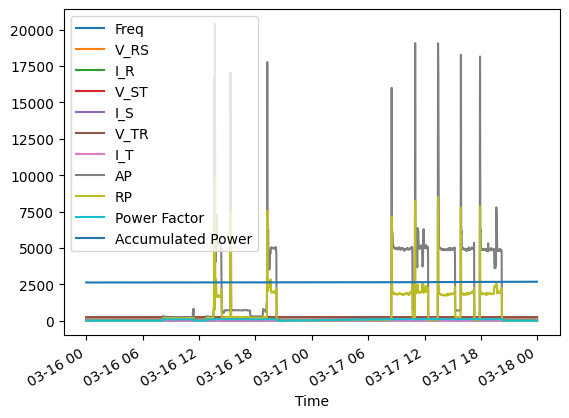

In [32]:
df.plot()

In [33]:
df2 = df[['V_RS', "V_ST", "V_TR"]]

<Axes: xlabel='Time'>

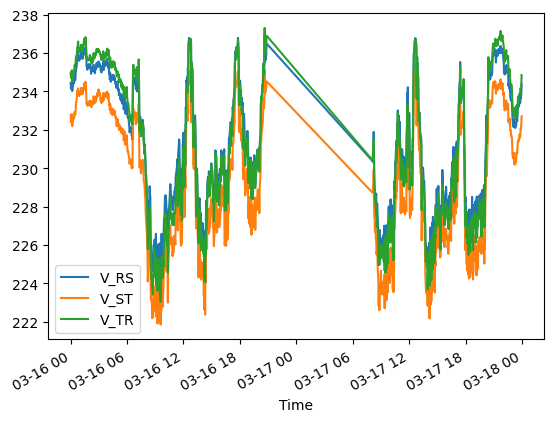

In [34]:
df2.plot()

<Axes: xlabel='Time'>

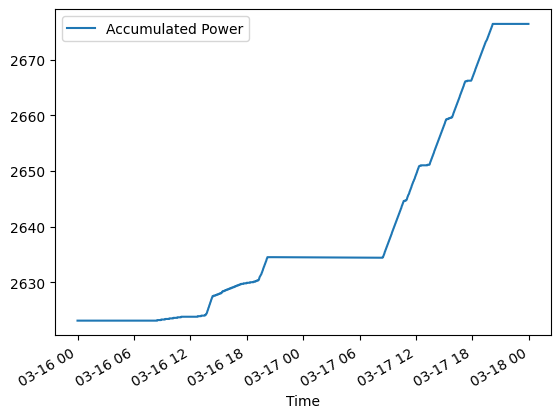

In [35]:
df[['Accumulated Power']].plot()

In [36]:
import matplotlib as mlp
import matplotlib.pyplot as plt

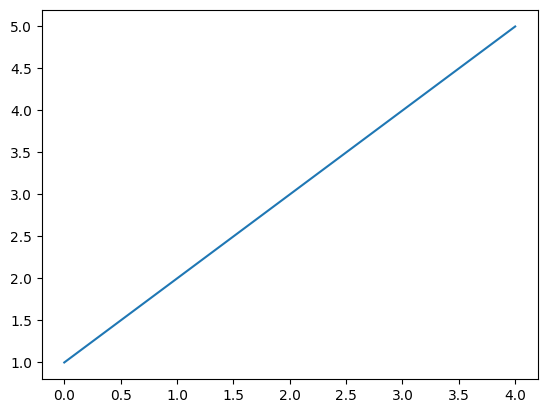

In [37]:
plt.plot([1,2,3,4,5])
plt.show()

In [38]:
t = np.linspace(0, 10, 100)
y = np.cos(t)

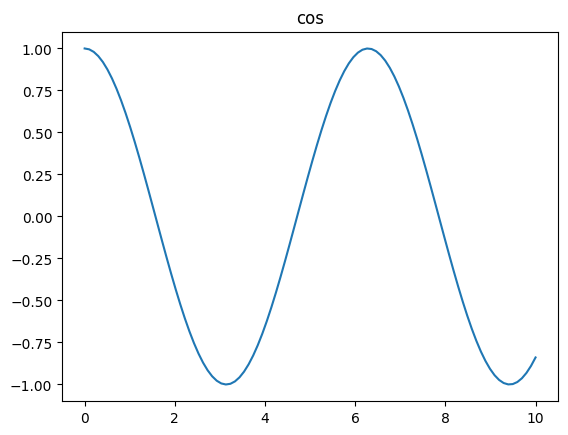

In [39]:
plt.title("cos")
plt.plot(t, y)

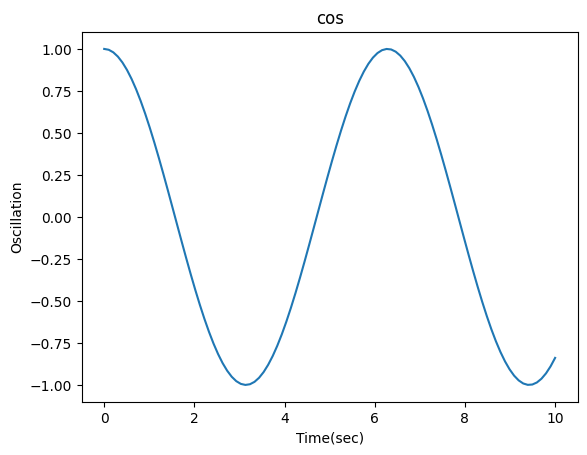

In [41]:
plt.title("cos")
plt.plot(t, y)
plt.xlabel("Time(sec)")
plt.ylabel("Oscillation")
plt.show()

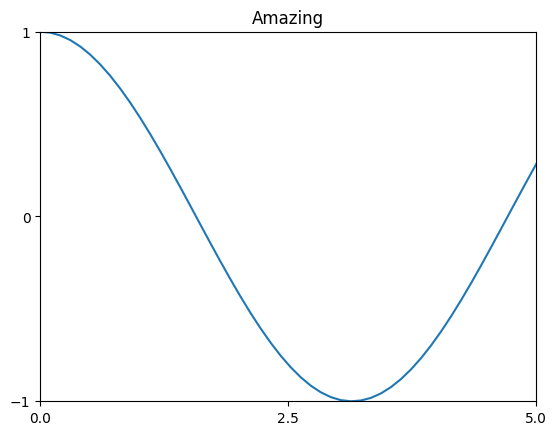

In [43]:
plt.plot(t, np.cos(t))
plt.xlim([0, 5])
plt.ylim([-1, 1])
plt.xticks([0, 2.5, 5])
plt.yticks([-1, 0, 1])
plt.title("Amazing")
plt.show()

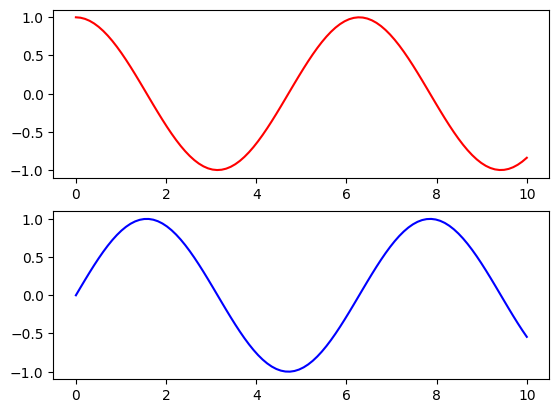

In [44]:
plt.subplot(2,1,1)
plt.plot(t, np.cos(t), 'r')
plt.subplot(2,1,2)
plt.plot(t, np.sin(t), 'b')

In [45]:
x = ["A", "B", "C"]
y = [23, 45, 23]

<BarContainer object of 3 artists>

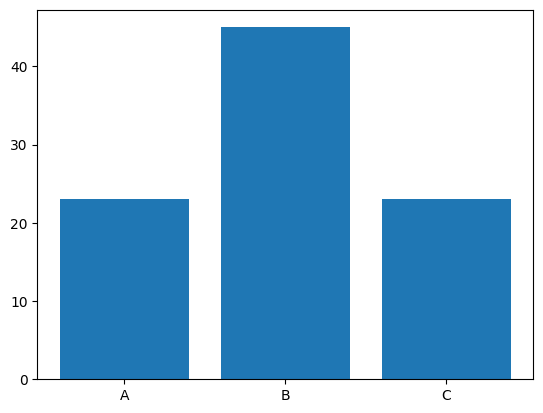

In [46]:
plt.bar(x, y)

#Neural Networks

In [47]:
def perception(x1, x2):
  w1 = 1.0
  w2 = 1.0
  b = 1.0

  signal = w1*x1 + w2*x2
  if signal <=b : 
    return 0
  else:
    return 1

In [48]:
perception(1,1)

1

In [49]:
perception(0.2, 0.2)

0

In [52]:
def And(x1, x2):
  w1, w2, b = 0.5, 0.5, 0.6
  signal = x1*w1 + x2*w2
  if signal <=b:
    return 0
  else:
    return 1

In [53]:
And(0,0)

0

In [54]:
And(1, 0)

0

In [55]:
And(0, 1)

0

In [56]:
And(1, 1)

1

In [57]:
def NAND(x1, x2):
  w1, w2, b = -0.5, -0.5, -0.7
  signal = x1*w1 + x2*w2
  if signal <= b:
    return 0
  else: 
    return 1

In [58]:
NAND(1, 1)

0

In [59]:
NAND(0, 0)

1

In [68]:
def OR(x1, x2):
  w1, w2, b = 0.50000001, 0.50000001, 0.5
  signal = w1*x1 + w2*x2
  if signal <= b:
    return 0
  else:
    return 1

In [69]:
OR(1, 1)

1

In [70]:
OR(1, 0)

1

In [71]:
OR(0, 0)

0